In [1]:
import numpy as np
from EM import EM
from plot import plot
import matplotlib.pyplot as plt

In [2]:
signal_name = 'creatinine'

treatment_names = {}
treatment_names['dialysis'] = ['dialysis'] 
treatment_names['nephrotoxic_drugs'] = ['acetaminophen_dose','celecoxib_dose','diclofenac_dose','ibuprofen_dose','indomethacin_dose',
'ketorolac_dose','meloxicam_dose','naproxen_dose', 'aminoglycoside', 'radiographic']
treatment_names['interference_drugs'] = ['dronedarone_dose', 'trimethoprim_dose']
treatment_names['diuretic'] = ['eplerenone_dose', 'amiloride_dose', 'hydrochlorothiazide_dose',
'spironolactone_dose', 'triamterene_dose', 'chlorothiazide_dose', 'indapamide_dose', 'torsemide_dose', 
'acetazolamide_dose', 'mannitol_dose']
treatment_names['ace_i'] = ['lisinopril_dose',
 'ramipril_dose',
 'benazepril_dose',
 'enalaprilat_dose',
 'captopril_dose',
 'perindopril_dose',
 'trandolapril_dose']
treatment_names['arb'] = ['valsartan_dose',
 'telmisartan_dose',
 'irbesartan_dose',
 'losartan_dose',
 'candesartan_dose']

#treatment_names['search'] = ['losartan', 'irbesartan', 'telmisartan', 'candesartan', 'valsartan']

chronic_keywords = ['chronic_kidney', 'kidney_cancer', 'sickle_cell', 'renal', 'esrd', 'diabetes', 'heart_failure']

demographic_names = ['age', 'gender', 'admit_weight']

In [3]:
# EM Setting
num_past_effects = 4
training_pct = .8
single_effect = False

In [4]:
data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')

In [14]:
%%time
em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect)
em.run_EM(0)

max iterations: 0 reached
CPU times: user 89.7 ms, sys: 36 ms, total: 126 ms
Wall time: 685 ms


In [15]:
for i, treatment in enumerate(treatment_names.keys()):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = chronic_keywords + demographic_names
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))
print('initial state variance: {}'.format(em.sigma_0))
print('transition noise: {}'.format(em.sigma_1))
print('observation noise: {}'.format(em.sigma_2))

Coefficient for dialysis: [ 0.00941293  0.0088966  -0.00478593 -0.02240226]
Coefficient for nephrotoxic_drugs: [ 0.00508231 -0.00472552  0.00837404  0.00503713]
Coefficient for interference_drugs: [0.00760141 0.01605279 0.00178935 0.0041698 ]
Coefficient for diuretic: [-9.60035406e-05 -9.85485318e-03  1.30056731e-02 -4.68960579e-03]
Coefficient for ace_i: [ 0.00850441 -0.00048934  0.01934573  0.01222683]
Coefficient for arb: [ 0.00284607 -0.0191147   0.00066285 -0.00829661]
Coefficient for chronic_kidney: 0.008003314972296423
Coefficient for kidney_cancer: 0.004699263805160709
Coefficient for sickle_cell: 0.0037947689062563022
Coefficient for renal: 0.007765023568648698
Coefficient for esrd: -0.011849726214263612
Coefficient for diabetes: -0.0018890637299824897
Coefficient for heart_failure: 0.014091575636884002
Coefficient for age: -0.0015587164799090306
Coefficient for gender: 0.012117028867241943
Coefficient for admit_weight: 0.013628719757630966
initial state variance: 0.0521887273

* Seems right
    * dialysis: large decrease, decreasing effect
    * kidney condition, sickle cell, renal insufficiency all positive
    * esrd: large positive (too large?)
    * gender: if 1 is male, more muscle mass, should be positive
* Not sure
    * nephrotoxic: small but all negative, should be positive
    * heart failure has some correlation w/ ckf, could be explained away?
    * diuiretic, ace_i, arb: smaller effects, but should be positive
    * interference drug: decrease, then reversible increase, as much as .4-.5

~2400 patients, bin size = 12

Coefficient for dialysis: [-1.25244691 -0.91004053 -0.21459075 -0.42475535]
Coefficient for nephrotoxic_drugs: [-0.08090726 -0.07991469 -0.0475412  -0.05704326]
Coefficient for interference_drugs: [-0.51968216  0.55852061 -0.5975565   0.45760547]
Coefficient for diuretic: [-0.03709144 -0.0906244  -0.00982771  0.00633813]
Coefficient for ace_i: [-0.1398929  -0.07606301  0.00553438 -0.05486874]
Coefficient for arb: [ 0.04790997  0.05916514  0.04554519 -0.02649363]
Coefficient for chronic_kidney: 1.3276992153677334
Coefficient for kidney_cancer: 0.4657241447060389
Coefficient for sickle_cell: 0.6944110901583288
Coefficient for renal: 0.36938015275431246
Coefficient for esrd: 4.979872491291173
Coefficient for diabetes: -0.011392474077059327
Coefficient for heart_failure: -0.10725797416111006
Coefficient for age: -0.010595353250786524
Coefficient for gender: 0.33801674162950984
Coefficient for admit_weight: -0.00391452359659601
initial state variance: 0.002450611017498509
transition noise: 0.3092411529988513
observation noise: 1.1462685855189954

~4900 patients, bin size = 18
Coefficient for dialysis: [-0.84369415 -0.20670296 -0.19209145 -0.12898347]
Coefficient for nephrotoxic_drugs: [ 0.0061965  -0.01760545 -0.03195994 -0.03811994]
Coefficient for interference_drugs: [ 0.08539192 -0.02559257 -0.0150296   0.28703508]
Coefficient for diuretic: [-0.0839336  -0.01663768 -0.03398865 -0.00229813]
Coefficient for ace_i: [-0.04267848 -0.03589504 -0.03006326  0.00650137]
Coefficient for arb: [-0.06834566  0.01926409 -0.02665397 -0.06530141]
Coefficient for chronic_kidney: 1.07540830272662
Coefficient for kidney_cancer: 0.22747302073201697
Coefficient for sickle_cell: 0.2978642268283123
Coefficient for renal: 0.2359794919131614
Coefficient for esrd: 4.243433886976185
Coefficient for diabetes: 0.007339300575137738
Coefficient for heart_failure: -0.2302044935520313
Coefficient for age: 0.0069989306726437606
Coefficient for gender: 0.25778374601214377
Coefficient for admit_weight: 0.008944466618056438
initial state variance: 0.0033114086040231102
transition noise: 0.20750738614923198
observation noise: 0.7733703877264095

In [16]:
good_examples=[771, 776]

Patient 1553


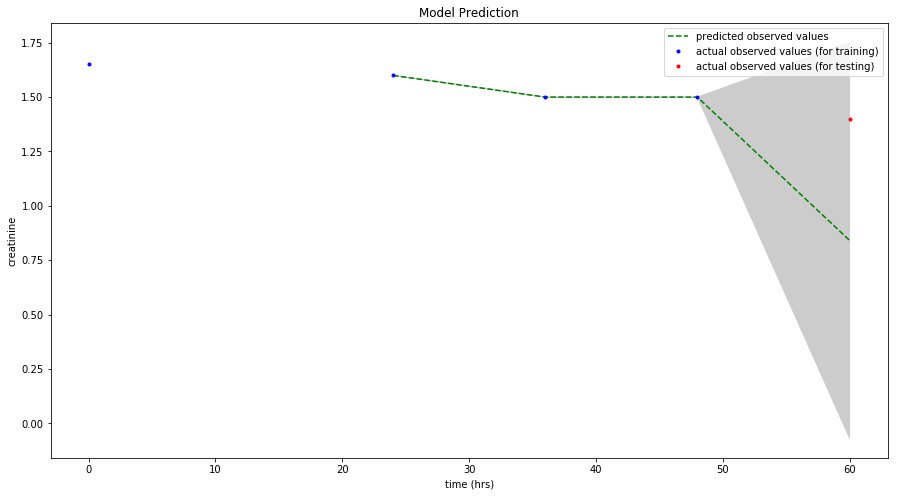

Patient 2110


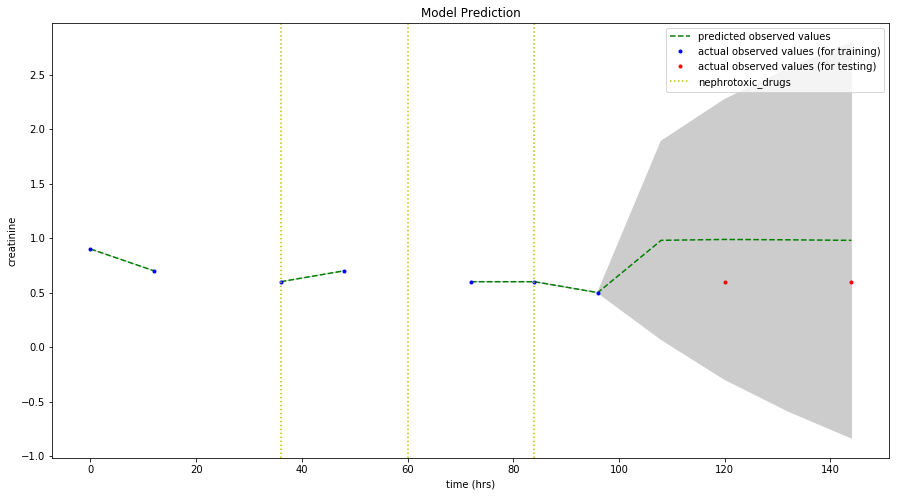

Patient 168


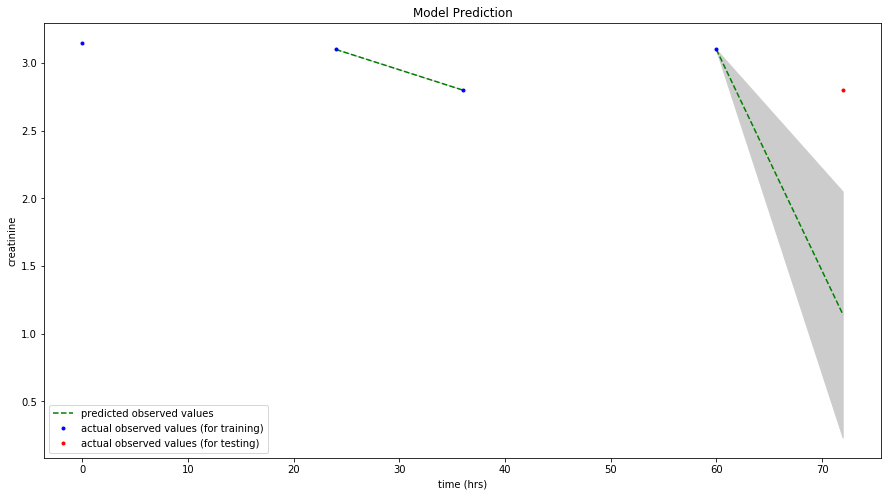

Patient 2086


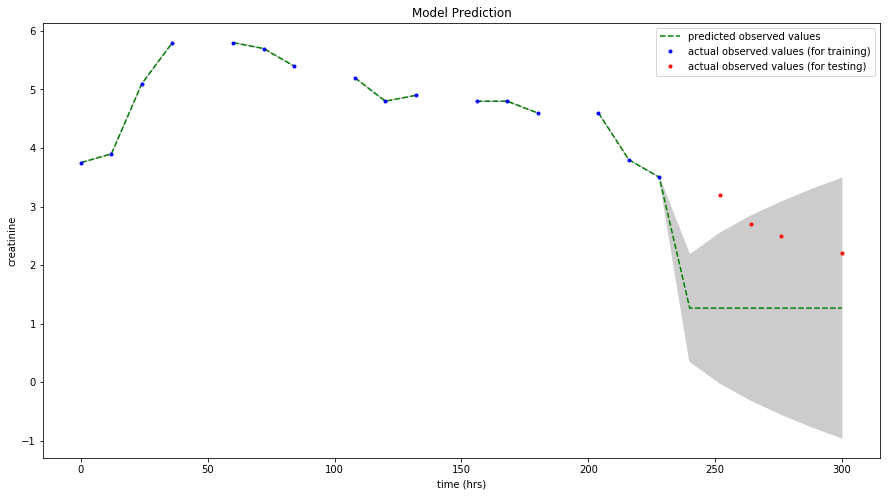

Patient 3477


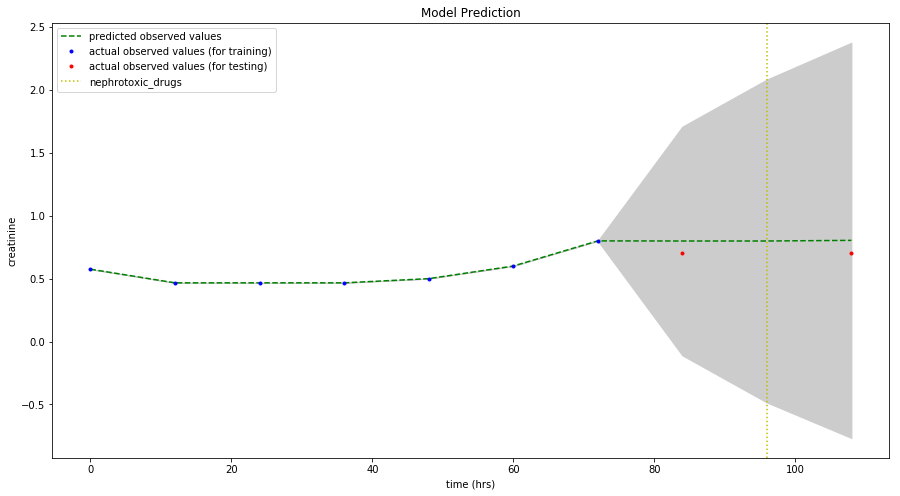

Patient 2628


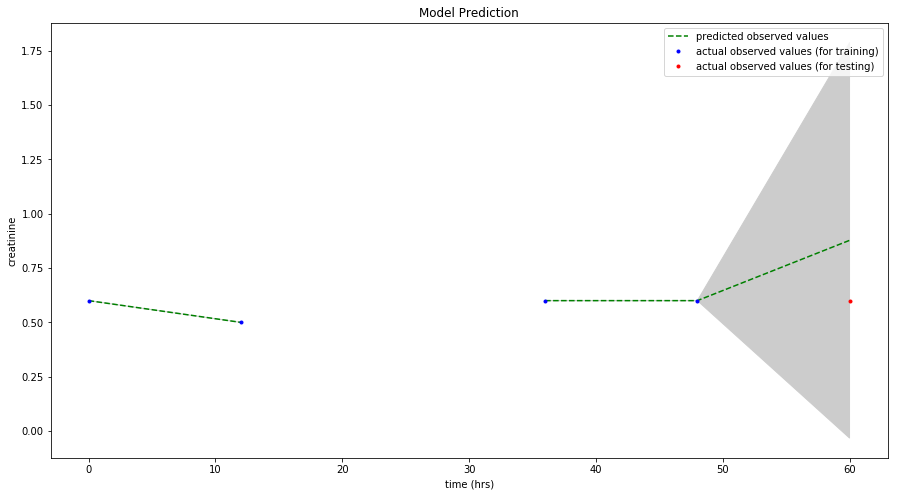

Patient 1586


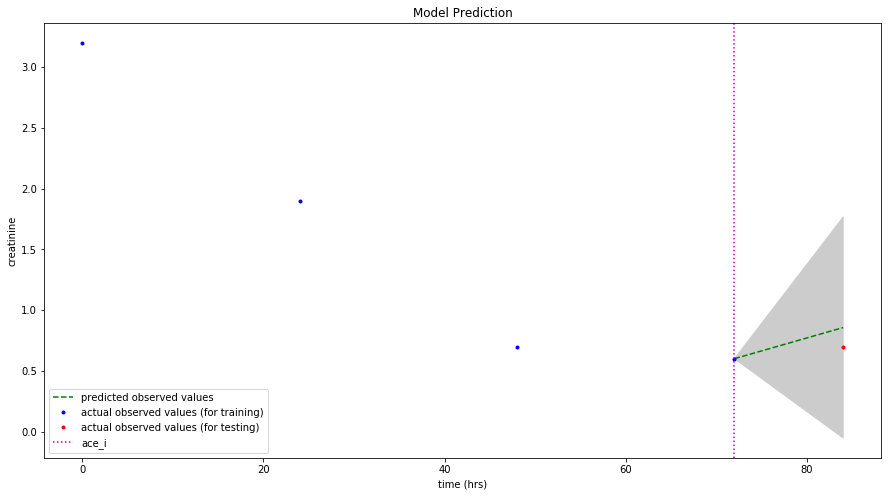

Patient 4722


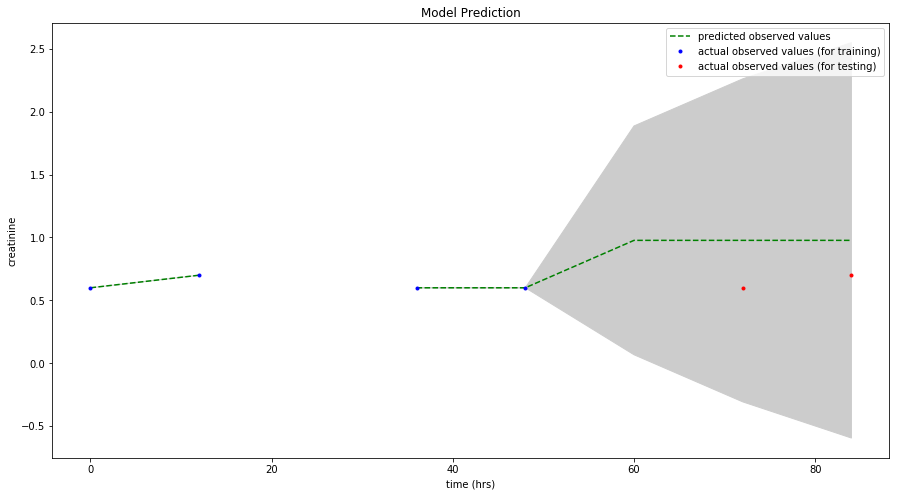

Patient 6677


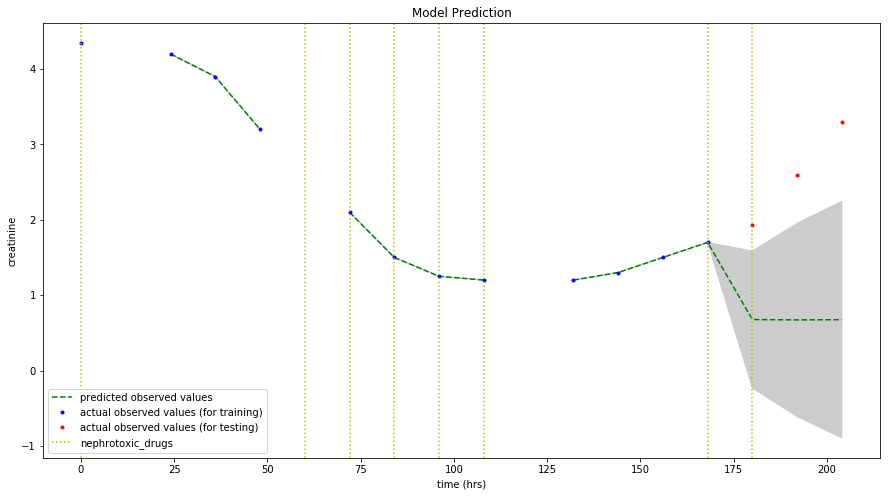

Patient 1416


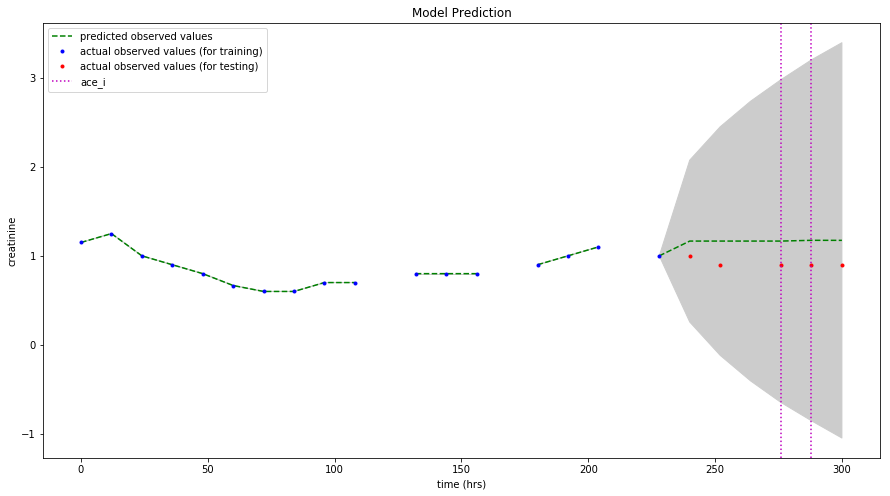

In [17]:
random_patients = np.random.randint(0, em.y.shape[0], 10)
for i in random_patients:
    plot(em, i, 12, signal_name, treatment_types=list(treatment_names.keys()))

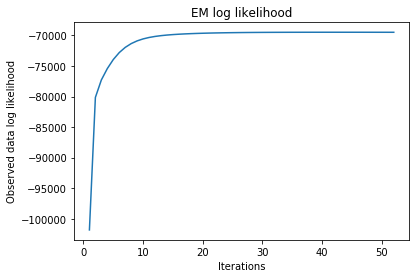

In [10]:
plt.plot([i for i in range(1, len(em.obs_log_lik))], em.obs_log_lik[1:])
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

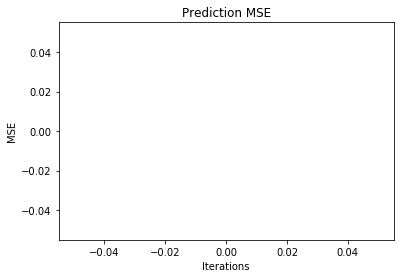

In [18]:
plt.plot([i for i in range(len(em.mse))], em.mse)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Prediction MSE')
plt.show()

### Analysis
Changes
* Only select patients with at least 4 training observations (total of 1821)

On real data
* Issues:
    * treatments coefficients are negative while they should be positive
        * changing initialization doesn't seem to help as model converges in bad local min, and most directions still don't change
    * observation noise is bigger than transition noise
    * run time is long, each iteration takes 4s, M step takes 2.5s, loglik takes 1s
* Reasons:
    * The increasing effects of treatments are not pronouced in the data (see Source Data Analysis)
        * it makes sense that nsaid and aspirin shows small number close to zero since their effects are 50-50.
        * transfusion platelet should be more negative than others, also makes sense.
        * the first number for plasma is a very negative number, but should be close to zero
        * anticoagulant are more negative than platelet, but should be more similar
    * bad noise estimation is expected, specifically underestimated initial state variance and overestimated observational noise 
    
On simulation
* Issues
    * b seems to be harder to identify correctly compared to A (sensitive to initialization)
    * estimated sigma 0 and sigma 2 are very different from the true value (not sensitive to initialization)
        * underestimate sigma 0, overestimate sigma 2
* Reasons
   

2000 iterations (haven't converged, 2nd decimal place different) took 2hrs
Coefficient for nsaid: [-0.05332823  0.01914507 -0.03836663]
Coefficient for transfusion_plasma: [-0.694217   -0.03495779 -0.0522998 ]
Coefficient for transfusion_platelet: [-0.38430565 -0.15892385 -0.31262086]
Coefficient for anticoagulant: [-0.63994745 -0.74545805 -0.5791365 ]
Coefficient for aspirin: [-0.06409683 -0.06972851  0.0302996 ]
Coefficient for chronic kidney failure: -0.2643214568560729
Coefficient for sickle cell: -0.5218307359528491
Coefficient for age: -0.027047728916270067
initial state variance: 0.00020395166620667873
transition noise: 0.14622894241670079
observation noise: 1.127059127544025